In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_table('spam.tsv')
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


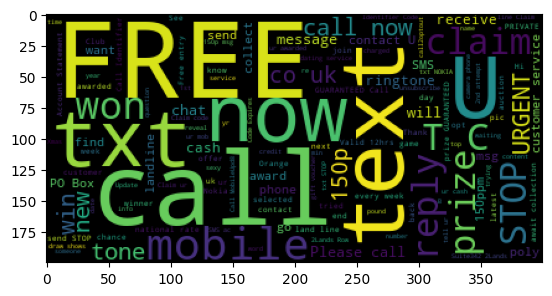

In [4]:
from wordcloud import WordCloud
wc = WordCloud()
wc.generate(" ".join(df[df['label'] == 'spam']['message']))
plt.imshow(wc)
plt.show()

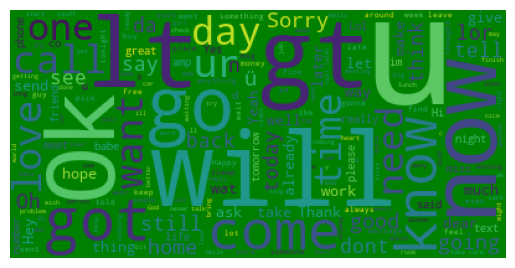

In [ ]:
wc = WordCloud(background_color= 'green')
wc.generate(" ".join(df[df['label'] == 'ham']['message']))
plt.imshow(wc)
plt.axis('off')
plt.show()

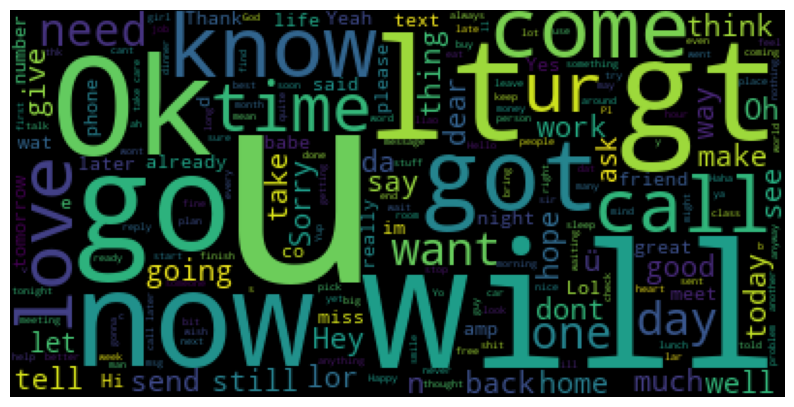

In [13]:
wc = WordCloud(background_color= 'black')
wc.generate(" ".join(df[df['label'] == 'ham']['message']))
plt.figure(figsize= (10,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

# **Count Vectorization**

In [14]:
# example
msg = [
    'i love python python',
    'python is fun',
    'python love datascience',
    'datascience is fun'
]

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
new = cv.fit_transform(msg).toarray()

In [17]:
new

array([[0, 0, 0, 1, 2],
       [0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0]], dtype=int64)

In [18]:
cv.get_feature_names_out()

array(['datascience', 'fun', 'is', 'love', 'python'], dtype=object)

# i love python python
['datascience', 'fun', 'is', 'love', 'python']
    0             0     0       1       2

# python is fun
['datascience', 'fun', 'is', 'love', 'python']
    0             1     1       0       1

# **📌 Types of Naive Bayes**

# Gaussian Naive Bayes

Used when features are continuous and assumed to follow a normal (Gaussian) distribution.

Example: Predicting whether a person has a disease based on continuous values like age, blood pressure, cholesterol.

# Multinomial Naive Bayes

Works with discrete/count data (like word counts or frequencies).

Common in text classification (spam detection, sentiment analysis).

Example: Number of times a word appears in an email.

# Bernoulli Naive Bayes

Features are binary (yes/no, 0/1).

Useful when presence/absence of a feature matters.

Example: Whether a document contains a specific word (yes/no).

# 👉 In practice:

Gaussian → continuous numeric data.

Multinomial → text data, word counts.

Bernoulli → binary features (0/1 presence).

In [19]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
from  sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [32]:
x = df['message']
y = df['label']

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv =  CountVectorizer()
x =  cv.fit_transform(x).toarray()

In [34]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.30, random_state= 1)

In [36]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)

    training_score = model.score(xtrain, ytrain)
    testing_score = model.score(xtest, ytest)

    print(f'Train: {training_score}\n Test: {testing_score}')
    print(classification_report(ytest, ypred))

    return model

In [38]:
mymodel(GaussianNB())

Train: 0.9571794871794872
 Test: 0.9013157894736842
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1442
           1       0.59      0.92      0.72       230

    accuracy                           0.90      1672
   macro avg       0.79      0.91      0.83      1672
weighted avg       0.93      0.90      0.91      1672



GaussianNB()

In [39]:
mymodel(MultinomialNB())

Train: 0.9925641025641025
 Test: 0.9838516746411483
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1442
           1       0.94      0.94      0.94       230

    accuracy                           0.98      1672
   macro avg       0.97      0.97      0.97      1672
weighted avg       0.98      0.98      0.98      1672



MultinomialNB()

In [40]:
mymodel(BernoulliNB())

Train: 0.9851282051282051
 Test: 0.9796650717703349
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1442
           1       0.97      0.88      0.92       230

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



BernoulliNB()